DS Assignment 16

Neural Networks

Forestfires

In [6]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# importing dataset

data=pd.read_csv("/content/forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Performing EDA & Visualization on dataset

In [11]:
# Geting Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [12]:
# Descriptive Satistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [13]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [14]:
data1=data.copy()
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [15]:
data1[data1.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [16]:
data1["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [17]:
data1["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [18]:
from sklearn import preprocessing

In [19]:
# Checking Correlation between numerical function
data1=data[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [20]:
cor=data1.corr()
cor

<ipython-input-20-0abd1d2ce4b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data1.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


<Axes: >

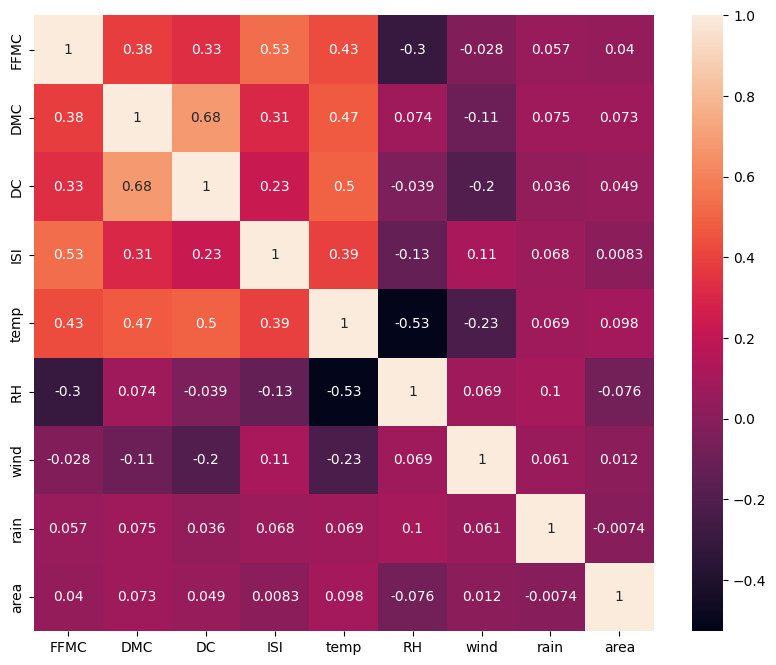

In [21]:
# creating heatmap by use of correlation

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

<ipython-input-22-4d10107be9a3>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(4,3,1), sns.countplot(data=data1, y='month')];


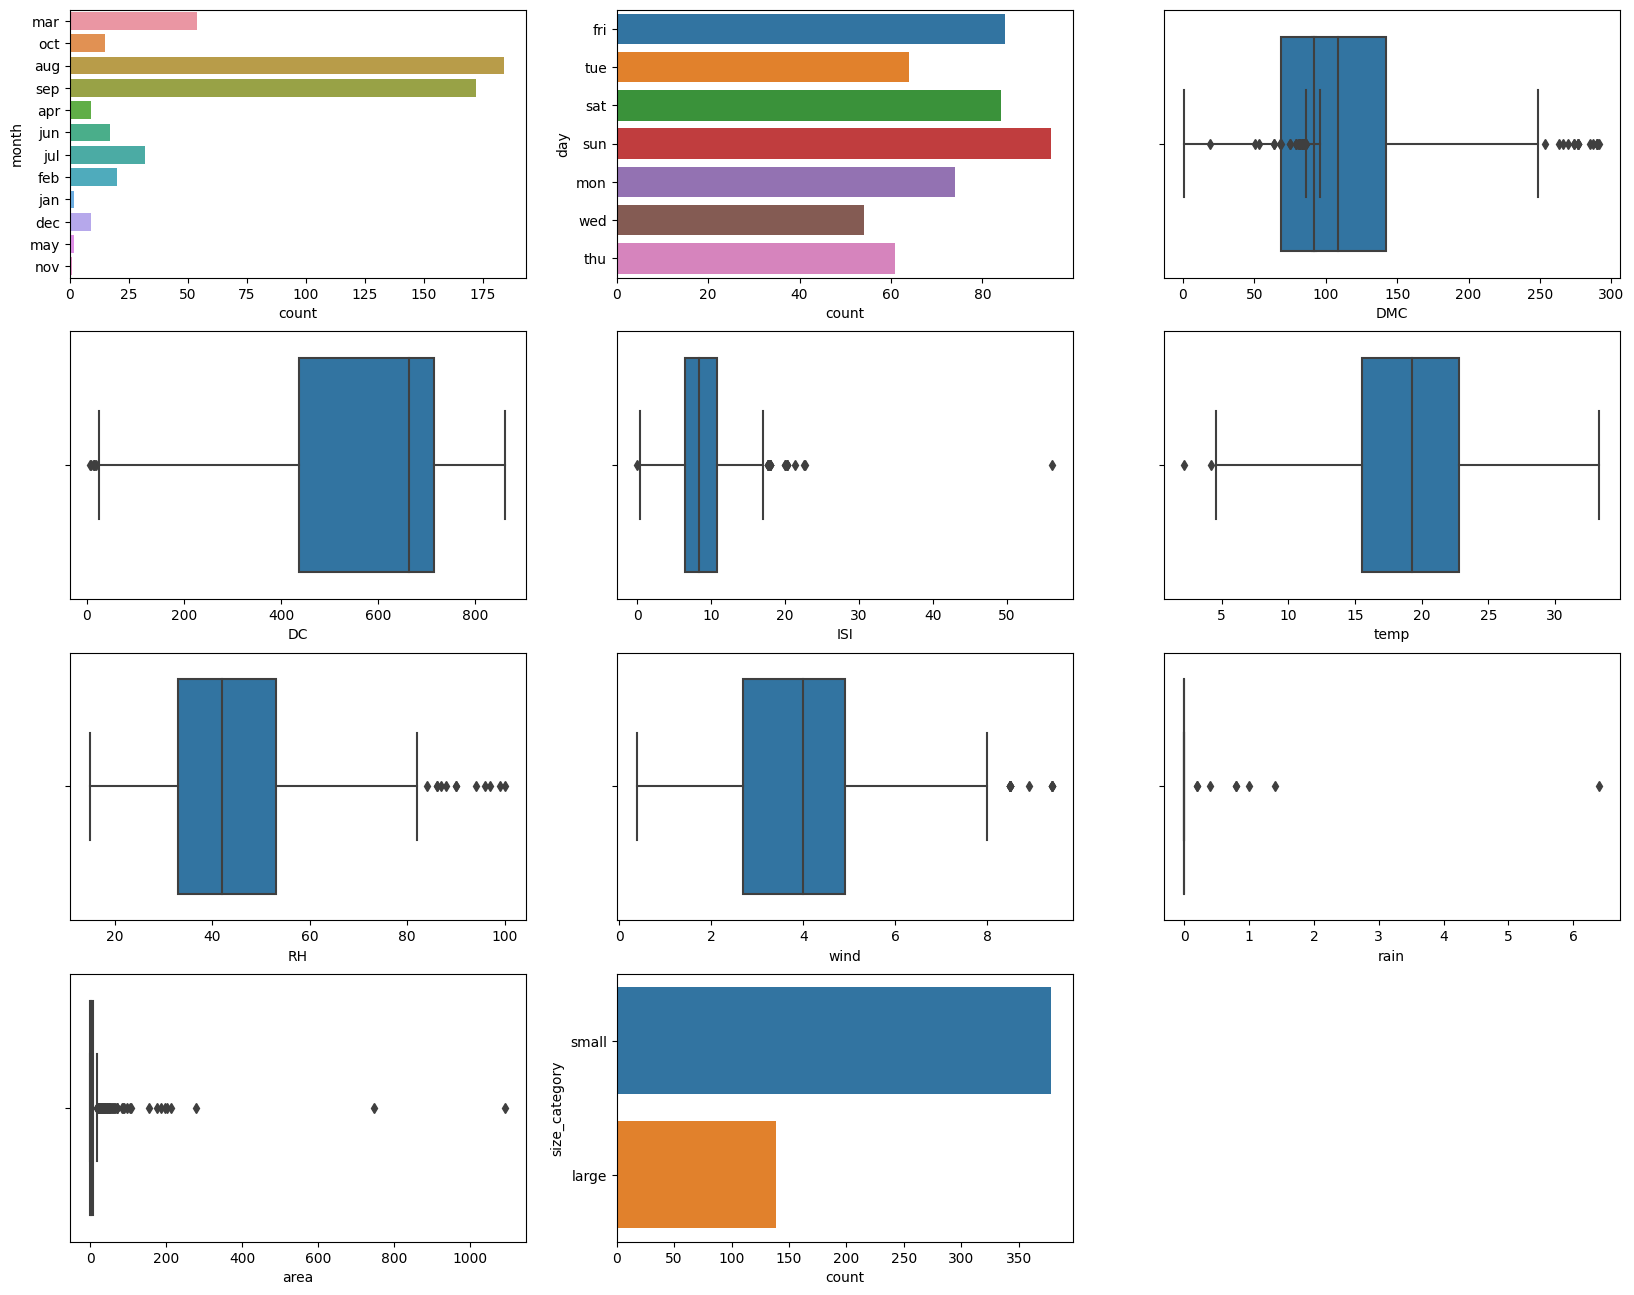

In [22]:
# Ploting Count plot
plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data=data1, y='month')];

[plt.subplot(4,3,2), sns.countplot(data=data1, y='day')];

[plt.subplot(4,3,3), sns.boxplot(x=data1["FFMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=data1["DMC"])];

[plt.subplot(4,3,4), sns.boxplot(x=data1["DC"])];

[plt.subplot(4,3,5), sns.boxplot(x=data1["ISI"])];

[plt.subplot(4,3,6), sns.boxplot(x=data1["temp"])];

[plt.subplot(4,3,7), sns.boxplot(x=data1["RH"])];

[plt.subplot(4,3,8), sns.boxplot(x=data1["wind"])];

[plt.subplot(4,3,9), sns.boxplot(x=data1["rain"])];

[plt.subplot(4,3,10), sns.boxplot(x=data1["area"])]

[plt.subplot(4,3,11), sns.countplot(data=data1, y='size_category')];

<ipython-input-23-dc19f01a3591>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[column],color='g',shade=True)
<ipython-input-23-dc19f01a3591>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[column],color='g',shade=True)
<ipython-input-23-dc19f01a3591>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[column],color='g',shade=True)
<ipython-input-23-dc19f01a3591>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[column],color='g',shade=True)
<ipython-input-23-dc19f01a3591>:6: F

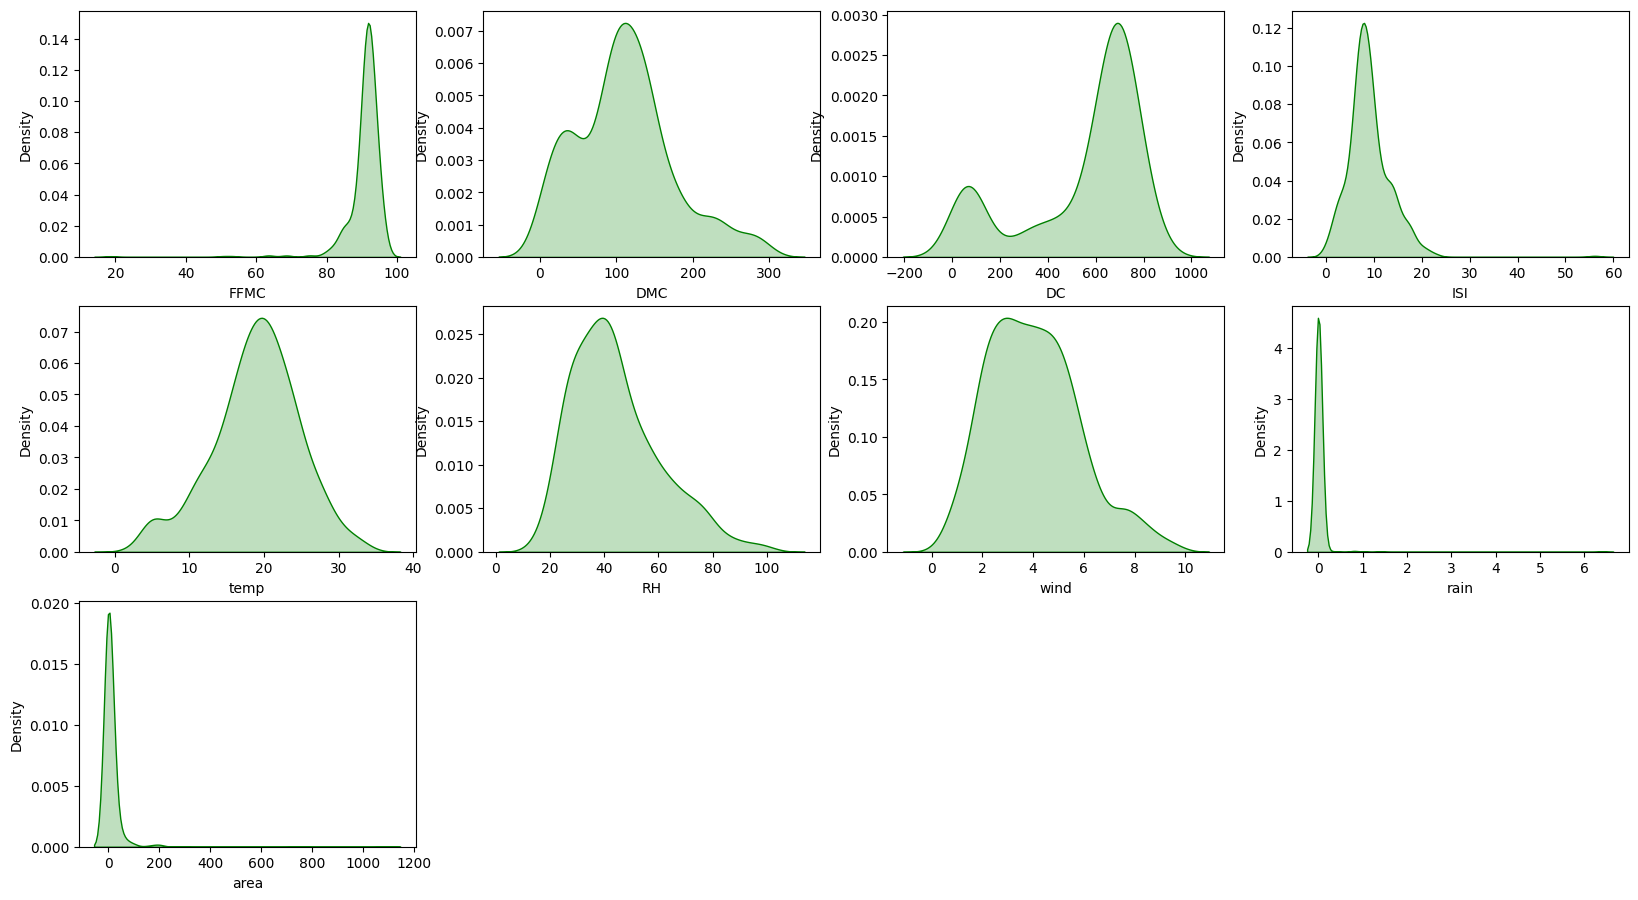

In [23]:
no_columns = data1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data1[column],color='g',shade=True)

<ipython-input-24-ff0264ead21a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1['area'],shade=True,color='r')


Text(0, 0.5, 'Rate')

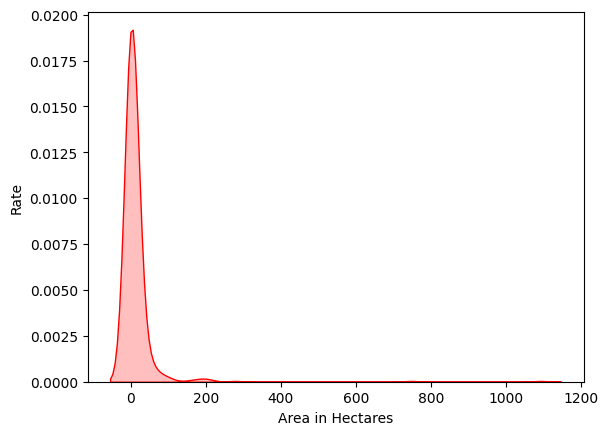

In [24]:
sns.kdeplot(data1['area'],shade=True,color='r')
plt.xlabel('Area in Hectares')
plt.ylabel('Rate')

### Histogram And Boxplot

<ipython-input-25-65a0e4f2243d>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(1,2,1),data1['FFMC'].hist(),plt.title("v")],[plt.subplot(1,2,2),sns.boxplot(x=data1["FFMC"])]


([<Axes: title={'center': 'v'}>,
  <Axes: title={'center': 'v'}>,
  Text(0.5, 1.0, 'v')],
 [<Axes: xlabel='FFMC'>, <Axes: xlabel='FFMC'>])

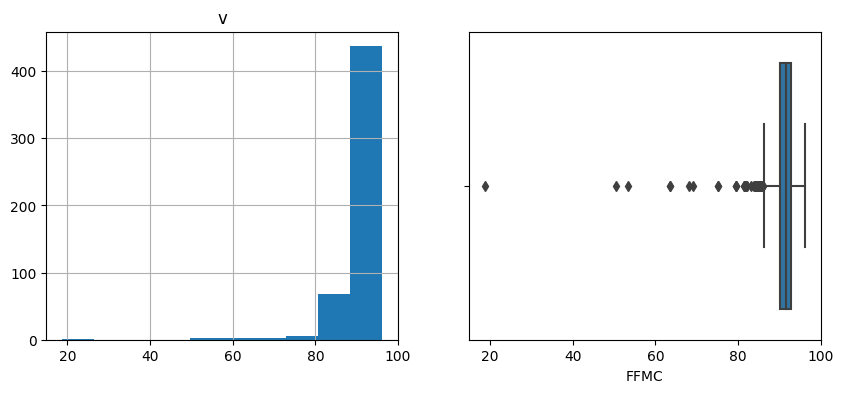

In [25]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['FFMC'].hist(),plt.title("v")],[plt.subplot(1,2,2),sns.boxplot(x=data1["FFMC"])]

<ipython-input-26-6c1acc8aa975>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(1,2,1),data1['DMC'].hist(),plt.title("DMC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DMC"])]


([<Axes: title={'center': 'DMC'}>,
  <Axes: title={'center': 'DMC'}>,
  Text(0.5, 1.0, 'DMC')],
 [<Axes: xlabel='DMC'>, <Axes: xlabel='DMC'>])

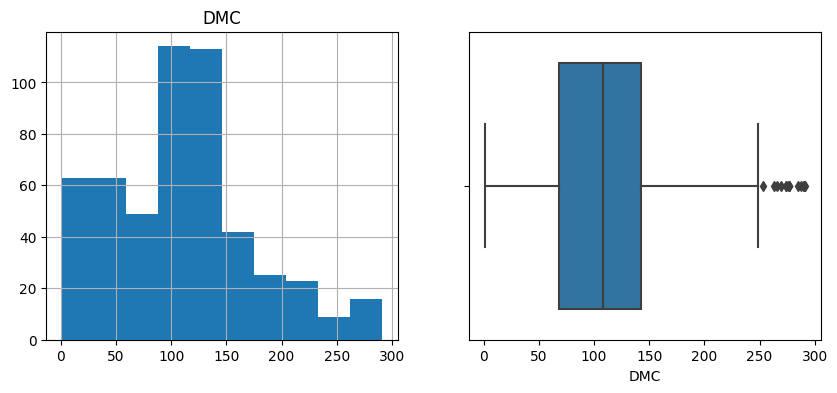

In [26]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['DMC'].hist(),plt.title("DMC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DMC"])]

<ipython-input-27-b64f18c9461e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(1,2,1),data1['DC'].hist(),plt.title("DC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DC"])]


([<Axes: title={'center': 'DC'}>,
  <Axes: title={'center': 'DC'}>,
  Text(0.5, 1.0, 'DC')],
 [<Axes: xlabel='DC'>, <Axes: xlabel='DC'>])

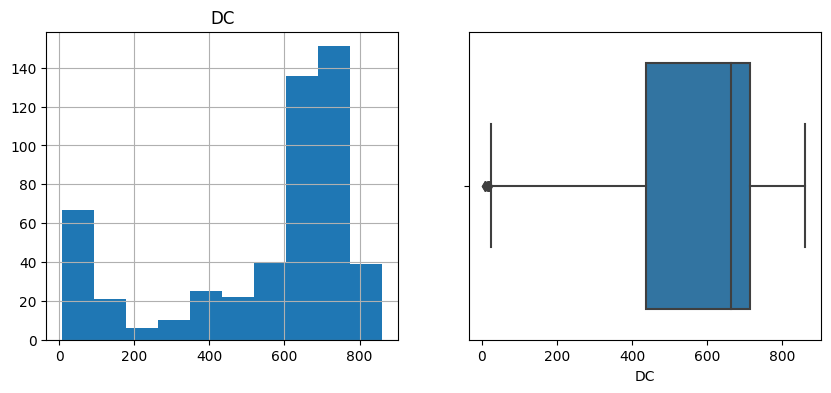

In [27]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['DC'].hist(),plt.title("DC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DC"])]

<ipython-input-28-139a04ce529b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(1,2,1),data1['ISI'].hist(),plt.title("ISI")],[plt.subplot(1,2,2),sns.boxplot(x=data1["ISI"])]


([<Axes: title={'center': 'ISI'}>,
  <Axes: title={'center': 'ISI'}>,
  Text(0.5, 1.0, 'ISI')],
 [<Axes: xlabel='ISI'>, <Axes: xlabel='ISI'>])

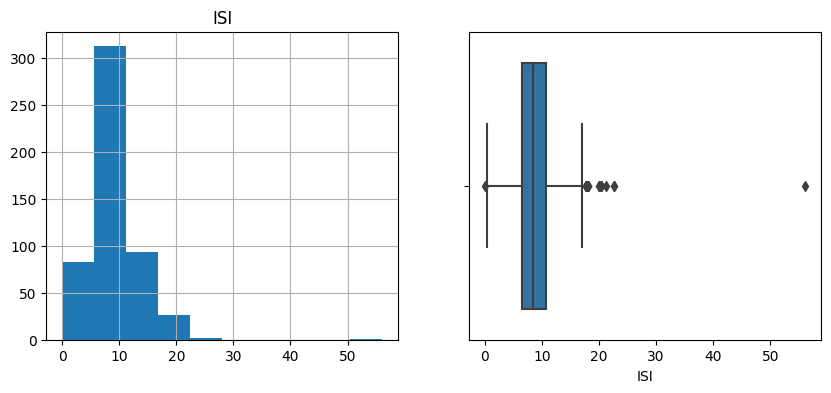

In [28]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['ISI'].hist(),plt.title("ISI")],[plt.subplot(1,2,2),sns.boxplot(x=data1["ISI"])]

<ipython-input-29-00047d0ab7f3>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(1,2,1),data1['temp'].hist(),plt.title("temp")],[plt.subplot(1,2,2),sns.boxplot(x=data1["temp"])]


([<Axes: title={'center': 'temp'}>,
  <Axes: title={'center': 'temp'}>,
  Text(0.5, 1.0, 'temp')],
 [<Axes: xlabel='temp'>, <Axes: xlabel='temp'>])

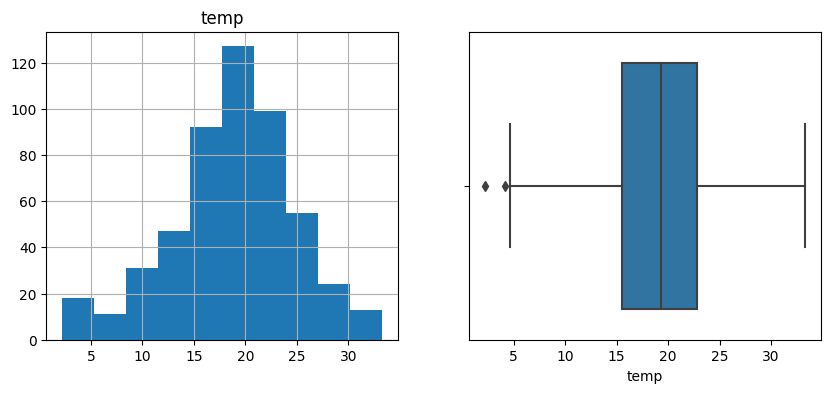

In [29]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['temp'].hist(),plt.title("temp")],[plt.subplot(1,2,2),sns.boxplot(x=data1["temp"])]

<ipython-input-30-981b2ecfc2d9>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(1,2,1),data1['RH'].hist(),plt.title("RH")],[plt.subplot(1,2,2),sns.boxplot(x=data1["RH"])]


([<Axes: title={'center': 'RH'}>,
  <Axes: title={'center': 'RH'}>,
  Text(0.5, 1.0, 'RH')],
 [<Axes: xlabel='RH'>, <Axes: xlabel='RH'>])

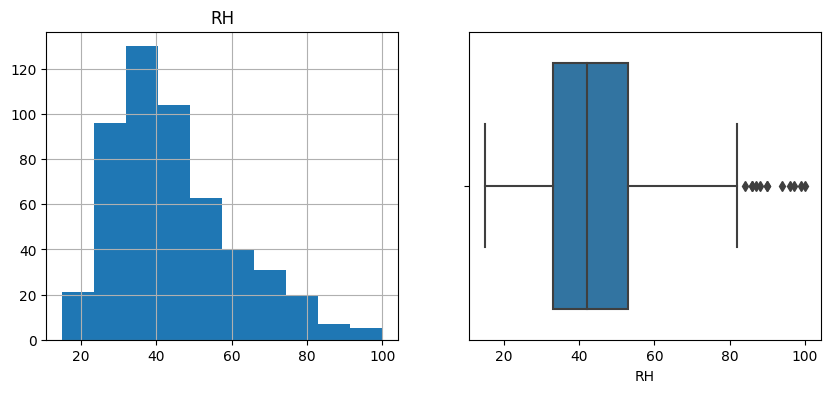

In [30]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['RH'].hist(),plt.title("RH")],[plt.subplot(1,2,2),sns.boxplot(x=data1["RH"])]

<ipython-input-31-bb5aadafc781>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(1,2,1),data1['wind'].hist(),plt.title("wind")],[plt.subplot(1,2,2),sns.boxplot(x=data1["wind"])]


([<Axes: title={'center': 'wind'}>,
  <Axes: title={'center': 'wind'}>,
  Text(0.5, 1.0, 'wind')],
 [<Axes: xlabel='wind'>, <Axes: xlabel='wind'>])

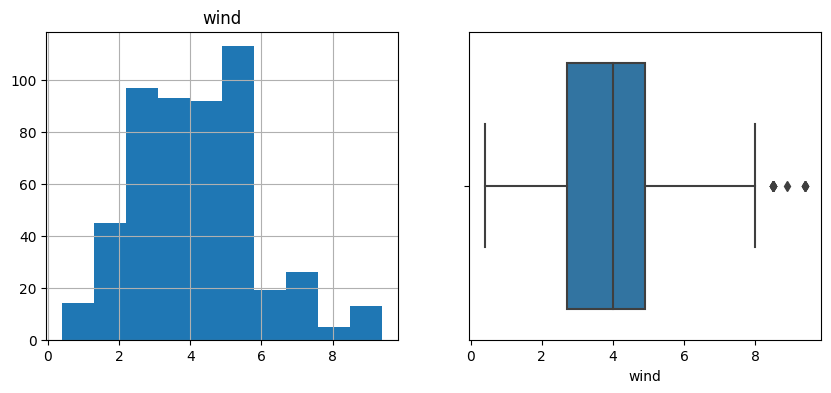

In [31]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['wind'].hist(),plt.title("wind")],[plt.subplot(1,2,2),sns.boxplot(x=data1["wind"])]

<ipython-input-32-dcbc5af239c6>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(1,2,1),data1['rain'].hist(),plt.title("rain")],[plt.subplot(1,2,2),sns.boxplot(x=data1["rain"])]


([<Axes: title={'center': 'rain'}>,
  <Axes: title={'center': 'rain'}>,
  Text(0.5, 1.0, 'rain')],
 [<Axes: xlabel='rain'>, <Axes: xlabel='rain'>])

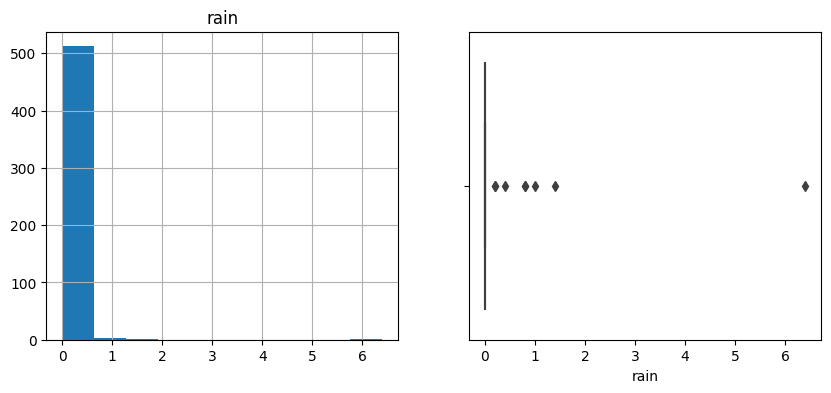

In [32]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['rain'].hist(),plt.title("rain")],[plt.subplot(1,2,2),sns.boxplot(x=data1["rain"])]

<ipython-input-33-ac0e60d8b529>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(1,2,1),data1['area'].hist(),plt.title("area")],[plt.subplot(1,2,2),sns.boxplot(x=data1["area"])]


([<Axes: title={'center': 'area'}>,
  <Axes: title={'center': 'area'}>,
  Text(0.5, 1.0, 'area')],
 [<Axes: xlabel='area'>, <Axes: xlabel='area'>])

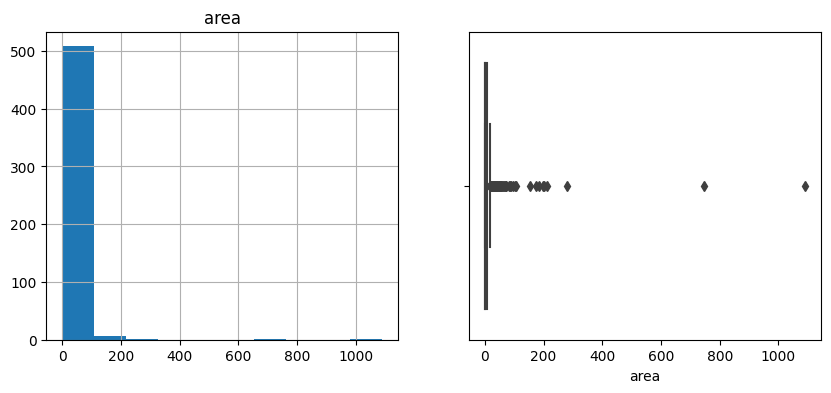

In [33]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['area'].hist(),plt.title("area")],[plt.subplot(1,2,2),sns.boxplot(x=data1["area"])]

In [34]:
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])

In [35]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [36]:
x = data.iloc[:,2:11]
y = data['size_category']

In [37]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [38]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [39]:
# fix random seed for reproducibility
seed = 9
np.random.seed(seed)

In [40]:
# creating model with ["relu" and "sigmoid"]

model = Sequential() # 0 level
model.add(Dense(12, input_dim=9,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [41]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model

In [42]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 17ms/step - loss: 3.7397 - accuracy: 0.6618 - val_loss: 1.8282 - val_accuracy: 0.6491
Epoch 2/250
35/35 [==============================] - 0s 8ms/step - loss: 1.4277 - accuracy: 0.7168 - val_loss: 1.7982 - val_accuracy: 0.7018
Epoch 3/250
35/35 [==============================] - 0s 7ms/step - loss: 1.0706 - accuracy: 0.7457 - val_loss: 1.4394 - val_accuracy: 0.7193
Epoch 4/250
35/35 [==============================] - 0s 8ms/step - loss: 0.8610 - accuracy: 0.7688 - val_loss: 1.5231 - val_accuracy: 0.7310
Epoch 5/250
35/35 [==============================] - 0s 9ms/step - loss: 0.7446 - accuracy: 0.7659 - val_loss: 1.4163 - val_accuracy: 0.7251
Epoch 6/250
35/35 [==============================] - 0s 6ms/step - loss: 0.7103 - accuracy: 0.7890 - val_loss: 1.2789 - val_accuracy: 0.7544
Epoch 7/250
35/35 [==============================] - 0s 6ms/step - loss: 0.6531 - accuracy: 0.7919 - val_loss: 0.7961 - val_accuracy: 0.7953
Epoch 8/250


In [43]:
# Evaluating the Model

score = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9845
accuracy: 98.45%


In [44]:
model.metrics_names, score 

(['loss', 'accuracy'], [0.04049600288271904, 0.9845260977745056])

In [45]:
# Visualzation of Training History

fil_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
fil_model.history['accuracy']  # just for understand

[0.6618497371673584,
 0.7167630195617676,
 0.7456647157669067,
 0.7687861323356628,
 0.7658959627151489,
 0.7890173196792603,
 0.7919074892997742,
 0.8092485666275024,
 0.8381502628326416,
 0.8786126971244812,
 0.9017341136932373,
 0.9219653010368347,
 0.9075144529342651,
 0.9248554706573486,
 0.9364162087440491,
 0.9248554706573486,
 0.9335260391235352,
 0.9566473960876465,
 0.9537572264671326,
 0.9421965479850769,
 0.9566473960876465,
 0.9653179049491882,
 0.9277456402778625,
 0.9566473960876465,
 0.9682080745697021,
 0.9595375657081604,
 0.9797688126564026,
 0.9508670568466187,
 0.9537572264671326,
 0.9624277353286743,
 0.9653179049491882,
 0.9826589822769165,
 0.97398841381073,
 0.9653179049491882,
 0.9450867176055908,
 0.9797688126564026,
 0.9797688126564026,
 0.9595375657081604,
 0.9566473960876465,
 0.9566473960876465,
 0.97398841381073,
 0.9826589822769165,
 0.9595375657081604,
 0.97398841381073,
 0.9913294911384583,
 0.9797688126564026,
 0.9826589822769165,
 0.9768785834312439

In [47]:
fil_model.history['val_accuracy']  # just for understand

[0.6491228342056274,
 0.7017543911933899,
 0.719298243522644,
 0.7309941649436951,
 0.7251461744308472,
 0.7543859481811523,
 0.7953216433525085,
 0.7836257219314575,
 0.7894737124443054,
 0.8304093480110168,
 0.8245614171028137,
 0.8771929740905762,
 0.9005848169326782,
 0.9064327478408813,
 0.9064327478408813,
 0.9181286692619324,
 0.9005848169326782,
 0.9356725215911865,
 0.8888888955116272,
 0.9532163739204407,
 0.9122806787490845,
 0.9532163739204407,
 0.8128654956817627,
 0.9473684430122375,
 0.9532163739204407,
 0.9298245906829834,
 0.9005848169326782,
 0.9415204524993896,
 0.8654970526695251,
 0.9473684430122375,
 0.9532163739204407,
 0.9590643048286438,
 0.9356725215911865,
 0.8362573385238647,
 0.9005848169326782,
 0.9707602262496948,
 0.9649122953414917,
 0.859649121761322,
 0.9415204524993896,
 0.9356725215911865,
 0.9707602262496948,
 0.9707602262496948,
 0.9005848169326782,
 0.9707602262496948,
 0.9473684430122375,
 0.9473684430122375,
 0.9298245906829834,
 0.970760226249

In [48]:
fil_model.history['loss']  # just for understand

[3.7396769523620605,
 1.42771315574646,
 1.0706067085266113,
 0.8609593510627747,
 0.7446248531341553,
 0.710303783416748,
 0.6530818343162537,
 0.5544261336326599,
 0.43498045206069946,
 0.35498112440109253,
 0.2523401081562042,
 0.19598214328289032,
 0.18146170675754547,
 0.16985423862934113,
 0.13934104144573212,
 0.15464212000370026,
 0.15774385631084442,
 0.12492595613002777,
 0.14822177588939667,
 0.13173134624958038,
 0.12224779278039932,
 0.10230091214179993,
 0.12798164784908295,
 0.12751255929470062,
 0.09317432343959808,
 0.11191706359386444,
 0.08343259245157242,
 0.10396841913461685,
 0.09720242023468018,
 0.11288559436798096,
 0.08089276403188705,
 0.073390893638134,
 0.08174628019332886,
 0.09772031754255295,
 0.2100227177143097,
 0.07496817409992218,
 0.059880517423152924,
 0.10519462078809738,
 0.1117819994688034,
 0.09759047627449036,
 0.07219091057777405,
 0.05214238539338112,
 0.07708539813756943,
 0.06769203394651413,
 0.051477935165166855,
 0.056368712335824966,
 

In [49]:
fil_model.history['val_loss']  # just for understand

[1.828223705291748,
 1.7981624603271484,
 1.43942129611969,
 1.5230777263641357,
 1.4162832498550415,
 1.2788735628128052,
 0.796132504940033,
 0.7777882814407349,
 0.981441855430603,
 0.6742264032363892,
 0.6565394997596741,
 0.2571885287761688,
 0.22774888575077057,
 0.20761637389659882,
 0.2082699090242386,
 0.19049003720283508,
 0.2066671997308731,
 0.18528355658054352,
 0.23684607446193695,
 0.17450791597366333,
 0.1672496646642685,
 0.18448768556118011,
 0.3990126848220825,
 0.15138910710811615,
 0.17383289337158203,
 0.19618499279022217,
 0.21033445000648499,
 0.13965333998203278,
 0.37814968824386597,
 0.13776463270187378,
 0.12945407629013062,
 0.12749670445919037,
 0.1676671952009201,
 0.7725377678871155,
 0.21270142495632172,
 0.11895367503166199,
 0.12384843081235886,
 0.5735903382301331,
 0.1622750610113144,
 0.14073136448860168,
 0.10343637317419052,
 0.10598238557577133,
 0.25534141063690186,
 0.10448964685201645,
 0.1282452642917633,
 0.13485440611839294,
 0.14349079132

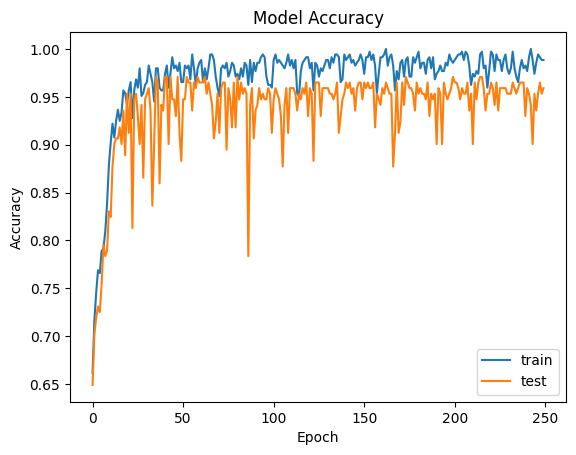

In [50]:
# # summarizaion of history for accuracy

plt.plot(fil_model.history['accuracy'])
plt.plot(fil_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

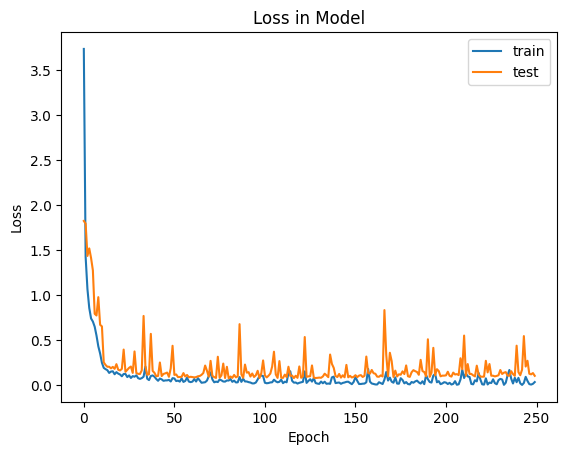

In [51]:
# # summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [52]:
predictions = model.predict(x)

17/17 [==============================] - 0s 2ms/step


### Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [53]:
# fix random seed for reproducibility
seed2 = 9
np.random.seed(seed2)

In [54]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear')) #1st layer
model2.add(Dense(9,  activation='linear')) #2nd layer
model2.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [55]:
# Compile model
# chaging optimizer older=ada, new=adadelta

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model2

In [56]:
# Fit the model
# Change ephocs from 250 to 200

fil_model2=model2.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 1s 12ms/step - loss: 201.3092 - accuracy: 0.2919 - val_loss: 191.5355 - val_accuracy: 0.3977
Epoch 2/200
35/35 [==============================] - 0s 5ms/step - loss: 200.6094 - accuracy: 0.2919 - val_loss: 190.8376 - val_accuracy: 0.3977
Epoch 3/200
35/35 [==============================] - 0s 5ms/step - loss: 199.8932 - accuracy: 0.2919 - val_loss: 190.1216 - val_accuracy: 0.3977
Epoch 4/200
35/35 [==============================] - 0s 5ms/step - loss: 199.1632 - accuracy: 0.2919 - val_loss: 189.3892 - val_accuracy: 0.3977
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 198.4148 - accuracy: 0.2890 - val_loss: 188.6396 - val_accuracy: 0.3977
Epoch 6/200
35/35 [==============================] - 0s 5ms/step - loss: 197.6500 - accuracy: 0.2919 - val_loss: 187.8816 - val_accuracy: 0.3977
Epoch 7/200
35/35 [==============================] - 0s 4ms/step - loss: 196.8781 - accuracy: 0.2919 - val_loss: 187.1105 - val_a

In [57]:
# Evaluating the Model

score2 = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 8.1904 - accuracy: 0.6325
accuracy: 63.25%


In [58]:
# Visualzation of Training History, metric name and score

model2.metrics_names, score2 , fil_model2.history.keys()

(['loss', 'accuracy'],
 [8.190437316894531, 0.6324951648712158],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [59]:
fil_model2.history['accuracy'] # just for understanding

[0.29190751910209656,
 0.29190751910209656,
 0.29190751910209656,
 0.29190751910209656,
 0.28901734948158264,
 0.29190751910209656,
 0.29190751910209656,
 0.29190751910209656,
 0.29190751910209656,
 0.29190751910209656,
 0.29190751910209656,
 0.29190751910209656,
 0.29190751910209656,
 0.2947976887226105,
 0.2976878583431244,
 0.2976878583431244,
 0.2976878583431244,
 0.3005780279636383,
 0.3005780279636383,
 0.3005780279636383,
 0.2976878583431244,
 0.2976878583431244,
 0.2976878583431244,
 0.3005780279636383,
 0.3005780279636383,
 0.3005780279636383,
 0.3034681975841522,
 0.3034681975841522,
 0.3034681975841522,
 0.3034681975841522,
 0.3034681975841522,
 0.3034681975841522,
 0.3034681975841522,
 0.3034681975841522,
 0.31213873624801636,
 0.31213873624801636,
 0.31213873624801636,
 0.31213873624801636,
 0.31213873624801636,
 0.3150289058685303,
 0.3179190754890442,
 0.3179190754890442,
 0.3179190754890442,
 0.3179190754890442,
 0.3179190754890442,
 0.3179190754890442,
 0.3236994147300

In [60]:
fil_model2.history['val_accuracy']  # just for understanding

[0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.3976608216762543,
 0.4035087823867798,
 0.4035087823867798,
 0.4035087823867798,
 0.4035087823

In [61]:
fil_model.history['loss']  # just for understanding

[3.7396769523620605,
 1.42771315574646,
 1.0706067085266113,
 0.8609593510627747,
 0.7446248531341553,
 0.710303783416748,
 0.6530818343162537,
 0.5544261336326599,
 0.43498045206069946,
 0.35498112440109253,
 0.2523401081562042,
 0.19598214328289032,
 0.18146170675754547,
 0.16985423862934113,
 0.13934104144573212,
 0.15464212000370026,
 0.15774385631084442,
 0.12492595613002777,
 0.14822177588939667,
 0.13173134624958038,
 0.12224779278039932,
 0.10230091214179993,
 0.12798164784908295,
 0.12751255929470062,
 0.09317432343959808,
 0.11191706359386444,
 0.08343259245157242,
 0.10396841913461685,
 0.09720242023468018,
 0.11288559436798096,
 0.08089276403188705,
 0.073390893638134,
 0.08174628019332886,
 0.09772031754255295,
 0.2100227177143097,
 0.07496817409992218,
 0.059880517423152924,
 0.10519462078809738,
 0.1117819994688034,
 0.09759047627449036,
 0.07219091057777405,
 0.05214238539338112,
 0.07708539813756943,
 0.06769203394651413,
 0.051477935165166855,
 0.056368712335824966,
 

In [62]:
fil_model.history['val_loss']  # just for understanding

[1.828223705291748,
 1.7981624603271484,
 1.43942129611969,
 1.5230777263641357,
 1.4162832498550415,
 1.2788735628128052,
 0.796132504940033,
 0.7777882814407349,
 0.981441855430603,
 0.6742264032363892,
 0.6565394997596741,
 0.2571885287761688,
 0.22774888575077057,
 0.20761637389659882,
 0.2082699090242386,
 0.19049003720283508,
 0.2066671997308731,
 0.18528355658054352,
 0.23684607446193695,
 0.17450791597366333,
 0.1672496646642685,
 0.18448768556118011,
 0.3990126848220825,
 0.15138910710811615,
 0.17383289337158203,
 0.19618499279022217,
 0.21033445000648499,
 0.13965333998203278,
 0.37814968824386597,
 0.13776463270187378,
 0.12945407629013062,
 0.12749670445919037,
 0.1676671952009201,
 0.7725377678871155,
 0.21270142495632172,
 0.11895367503166199,
 0.12384843081235886,
 0.5735903382301331,
 0.1622750610113144,
 0.14073136448860168,
 0.10343637317419052,
 0.10598238557577133,
 0.25534141063690186,
 0.10448964685201645,
 0.1282452642917633,
 0.13485440611839294,
 0.14349079132

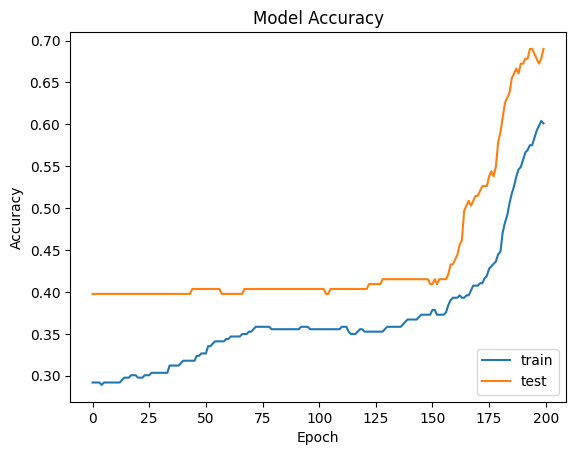

In [63]:
# # summarizaion of history for accuracy

plt.plot(fil_model2.history['accuracy'])
plt.plot(fil_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

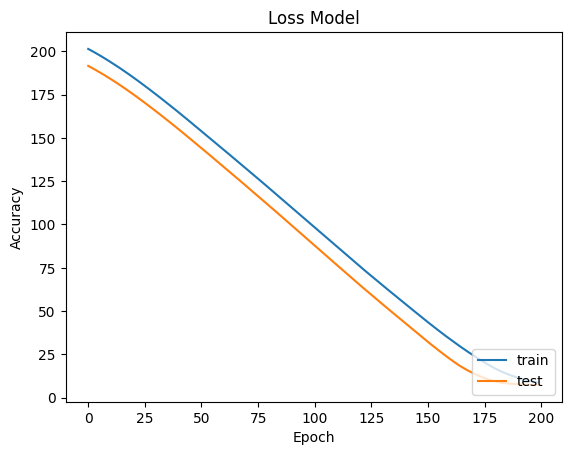

In [64]:
# # summarizaion of history for loss

plt.plot(fil_model2.history['loss'])
plt.plot(fil_model2.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [65]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [66]:
# creating model with ["sigmoid" and "logistic"]

model3 = Sequential() # 0 level
model3.add(Dense(14, input_dim=9,  activation='relu')) # FIRST LAYER
model3.add(Dense(9,  activation='sigmoid')) #2nd layer
model3.add(Dense(1, activation='tanh')) #3rd layer or op layer

In [67]:
# Compile model
# chaging optimizer older=adadelta/ada, new=adagrad

model3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [68]:
# Fit the model
# Change ephocs

fil_model3=model3.fit(x, y, validation_split=0.33, epochs=300, batch_size=15)

Epoch 1/300
24/24 [==============================] - 1s 11ms/step - loss: 1.3077 - accuracy: 0.3439 - val_loss: 2.4993 - val_accuracy: 0.3801
Epoch 2/300
24/24 [==============================] - 0s 4ms/step - loss: 1.1772 - accuracy: 0.3497 - val_loss: 2.1998 - val_accuracy: 0.3801
Epoch 3/300
24/24 [==============================] - 0s 4ms/step - loss: 1.1528 - accuracy: 0.3497 - val_loss: 2.0586 - val_accuracy: 0.3801
Epoch 4/300
24/24 [==============================] - 0s 4ms/step - loss: 1.0688 - accuracy: 0.3497 - val_loss: 2.0104 - val_accuracy: 0.3801
Epoch 5/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9719 - accuracy: 0.3555 - val_loss: 1.9225 - val_accuracy: 0.3801
Epoch 6/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9139 - accuracy: 0.3555 - val_loss: 1.8799 - val_accuracy: 0.3684
Epoch 7/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9000 - accuracy: 0.3555 - val_loss: 1.7587 - val_accuracy: 0.3684
Epoch 8/300


In [69]:
# Evaluating the Model

score3 = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.6692
accuracy: 66.92%


In [70]:
# Visualzation of Training History, metric name and score

model3.metrics_names, score3 , fil_model3.history.keys()

(['loss', 'accuracy'],
 [0.6942266225814819, 0.6692456603050232],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

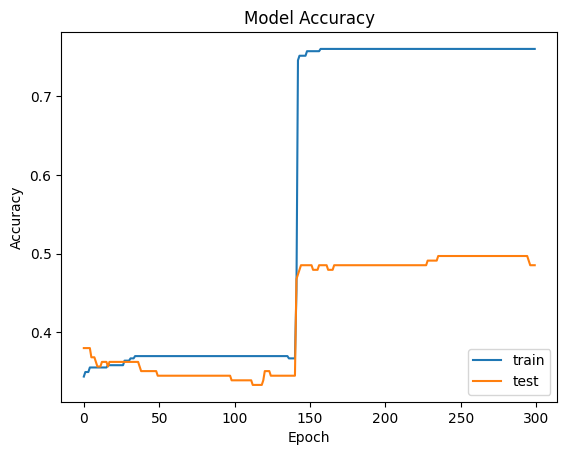

In [71]:
# # summarizaion of history for accuracy

plt.plot(fil_model3.history['accuracy'])
plt.plot(fil_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

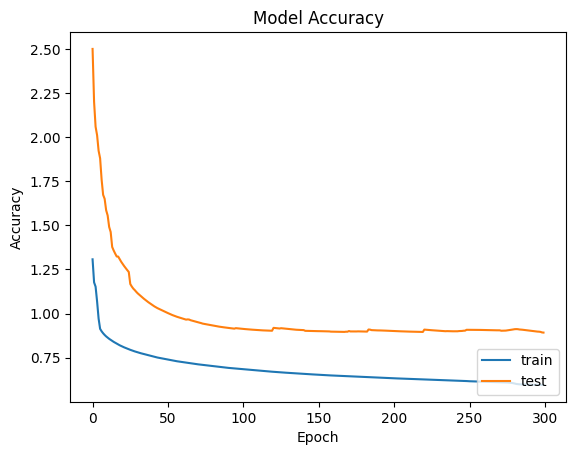

In [72]:
# # summarizaion of history for loss

plt.plot(fil_model3.history['loss'])
plt.plot(fil_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### AS per calcluation "relu" activation function helping to uncrease accuracy